## import libraries 


In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# modeling 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression ,Ridge , Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor 
import warnings




In [4]:
df= pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X  and Y variables 

In [6]:
x = df.drop(columns=['math score'] , axis=1)
y = df['math score']

In [7]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [10]:
for col in df.select_dtypes('object').columns:
    print(col)
    print(df[col].unique())
    print("---------------------------")


gender
['female' 'male']
---------------------------
race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
---------------------------
parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
---------------------------
lunch
['standard' 'free/reduced']
---------------------------
test preparation course
['none' 'completed']
---------------------------


In [11]:
# create column transformer with 3 types of transformers
num_cols = x.select_dtypes('number').columns
cat_cols = x.select_dtypes('object').columns

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('oneHotencoder',cat_transformer , cat_cols),
        ('standerScaler',num_transformer , num_cols),
    ]
)

In [12]:
x = preprocessor.fit_transform(x)

In [14]:
x.shape

(1000, 19)

In [16]:
# seperate dataset into train and test 
x_trian,x_test,y_train,y_test =train_test_split(x,y,test_size=.2 , random_state=42)

x_trian.shape,x_test.shape

((800, 19), (200, 19))

#### create an Evaluate Function to give all metrics after model training


In [18]:
def evaluate_model(true , predicted):
    mae=mean_absolute_error(true , predicted)
    mse=mean_squared_error(true , predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square= r2_score(true , predicted)
    return mae , mse , rmse , r2_square

In [23]:
# list of the all models we will train with it 
models = {
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'k-Neighbors-regressor':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoostRegressor':CatBoostRegressor(verbose=False),
    'AdaBoostRegressor':AdaBoostRegressor()
}

model_list = []
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_trian , y_train)

    # make the predictions

    y_train_pred = model.predict(x_trian)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset 
    model_train_mae , model_train_mse , model_train_rmse , model_train_r2_square = evaluate_model(y_train, y_train_pred)

    
    model_test_mae , model_test_mse , model_test_rmse , model_test_r2_square = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set ')
    print(f"-Root mean squared Error : {model_train_rmse:.4f}")
    print(f"-mean squared Error : {model_train_mse:.4f}")
    print(f"-mean absolute Error : {model_train_mae:.4f}")
    print(f"-R2 Score : {model_train_r2_square:.4f}")
    
    print("-----------------------------------------")


    
    print('Model performance for testing set ')
    print(f"-Root mean squared Error : {model_test_rmse:.4f}")
    print(f"-mean squared Error : {model_test_mse:.4f}")
    print(f"-mean absolute Error : {model_test_mae:.4f}")
    print(f"-R2 Score : {model_test_r2_square:.4f}")

    r2_list.append(model_test_r2_square)

    print("=" * 40)
    print('\n')







LinearRegression
Model performance for training set 
-Root mean squared Error : 5.3243
-mean squared Error : 28.3485
-mean absolute Error : 4.2671
-R2 Score : 0.8743
-----------------------------------------
Model performance for testing set 
-Root mean squared Error : 5.3960
-mean squared Error : 29.1167
-mean absolute Error : 4.2158
-R2 Score : 0.8803


Lasso
Model performance for training set 
-Root mean squared Error : 6.5938
-mean squared Error : 43.4784
-mean absolute Error : 5.2063
-R2 Score : 0.8071
-----------------------------------------
Model performance for testing set 
-Root mean squared Error : 6.5197
-mean squared Error : 42.5064
-mean absolute Error : 5.1579
-R2 Score : 0.8253


Ridge
Model performance for training set 
-Root mean squared Error : 5.3233
-mean squared Error : 28.3378
-mean absolute Error : 4.2650
-R2 Score : 0.8743
-----------------------------------------
Model performance for testing set 
-Root mean squared Error : 5.3904
-mean squared Error : 29.0563

In [24]:
pd.DataFrame(list(zip(model_list , r2_list)),columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'] , ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880345
5,Random Forest Regressor,0.852448
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.851443
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,k-Neighbors-regressor,0.783813
4,Decision Tree,0.737752


# Linear Regression 

In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(x_trian,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test , y_pred)*100

print(f'Accuracy of the model is {score}')

Accuracy of the model is 88.03449074540941


Text(0, 0.5, 'prediction')

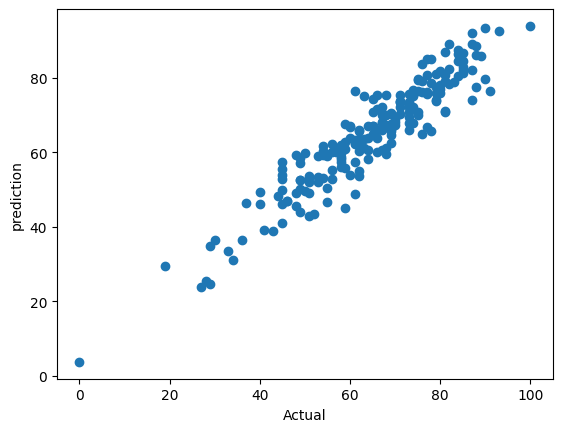

In [26]:
# plot y_prd and y_test 
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('prediction')

<Axes: xlabel='math score'>

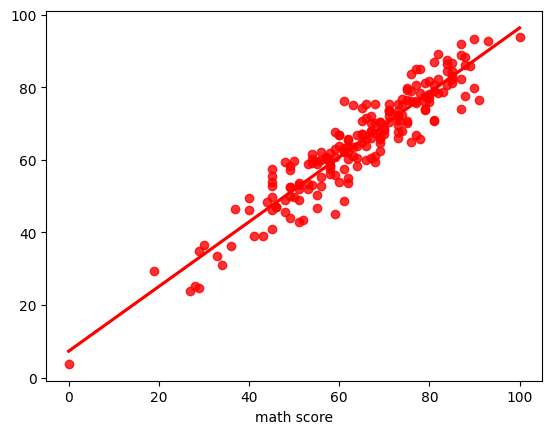

In [27]:
sns.regplot(x=y_test ,y=y_pred , ci = None , color= 'red')

### Difference between Actual and predicted Values

In [28]:
prd_df= pd.DataFrame({'Actual Value':y_test , 'prdicted value': y_pred , 'Difference':y_test-y_pred})
prd_df

,Actual Value,prdicted value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812


In [30]:
prd_df.describe()

,Actual Value,prdicted value,Difference
count,200.000000,200.000000,200.000000
mean,64.460000,64.698242,-0.238242
std,15.638453,14.835917,5.404253
min,0.000000,3.796875,-15.343750
25%,55.000000,55.939453,-3.667969
50%,66.000000,65.945312,-0.417969
75%,76.000000,75.474609,3.128906
max,100.000000,93.867188,14.492188
